In [1]:
# # %% Kutuphaneleri tanimla
# import os 
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import torch # pytorch kutuphanesi tensor islemleri
import torch.nn as nn # yapay sinir agi katmanlarini tanimlamak icin kullanicaz
import torch.optim as optim # optimizasyon algoritmalarini iceren modul
import torchvision # goruntu isleme ve preTrained modelleri icerir
import torchvision.transforms as transforms # goruntu donusumleri yapmak
#import seaborn as sns # veri gorsellestirmeleri yapmak icin


In [2]:
import matplotlib.pyplot as plt
# optional: cihazi belirle 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
def get_data_loaders(batch_size=64): # her iterasyonda islenecek veri miktari
    
    transform = transforms.Compose([
        transforms.ToTensor(), # Goruntuyu tensore cevirir ve 0-255 , 0-1 
        # olceklendirir
        transforms.Normalize((0.5,), (0.5,)) # pixel degerlerini -1,1 arasina
        # olcekler
        
    ])
    
    # MNIST veri setini indir ve egitim seti kumelerini olustur
    
    trainSet = torchvision.datasets.MNIST(root='./data',train=True,
                                          download=True,transform=transform)
    testSet = torchvision.datasets.MNIST(root='./data',train=False,
                                         download=True, transform=transform)
    
    trainLoader = torch.utils.data.DataLoader(trainSet, batch_size=batch_size,
                                          shuffle = True)
    testLoader = torch.utils.data.DataLoader(testSet, batch_size=batch_size,
                                             shuffle=False)
    return trainLoader, testLoader

In [4]:
trainLoader, testLoader = get_data_loaders()

In [5]:
# Data visualization

def visualize_samples(loader, n):
    images, labels = next(iter(loader))# ilk batchden goruntu ve etiket alalim
    fig, axes = plt.subplots(1, n, figsize=(10,5))# n farkli goruntu icin
    # gorsellestirme sagliyoruz
    for i in range(n):
        axes[i].imshow(images[i].squeeze(),cmap='gray')#gorseli gritonda goster
        axes[i].set_title(f'Label: {labels[i].item()}')#goruntuye ait etiketi
        # Baslik olarak almak icin yazilan kod
        axes[i].axis('off') # eksenleri gizle
    plt.show()

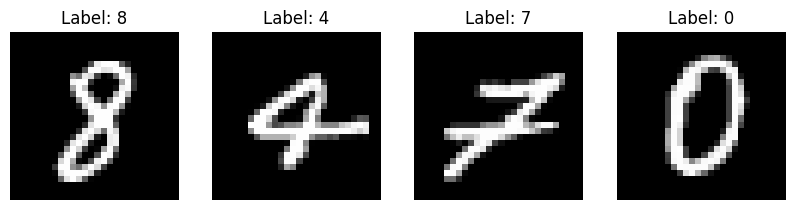

In [6]:
visualize_samples(trainLoader, 4)